# Word Embeddings: Properties and Application.



## GLoVe Recap ##

For this task we will use pretrained Glove embeddings. GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. Let's briefly revise the method:

**1. Coocurrence Matrix**

The primary hypothesis behind GloVe embeddings is that word vectors should capture the same relationships as the original terms in the text. To model these relationships, we compute the co-occurrence matrix for all words in the training corpus. This matrix is of size (vocabulary size × vocabulary size), where each entry 𝑖,𝑗 represents the number of times word 𝑖 appears within the context window of word 𝑗. The following figure shows this table for single digit numbers:

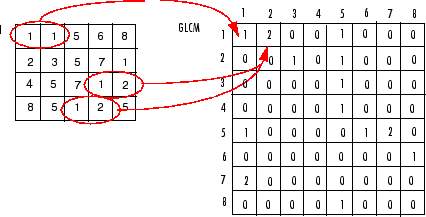

Having this table we can compute how related are different words by comparing how proable they are when compared to other words. An easy way to define this relation is by computing the probability $P_{ij} = X_{ij}/X_i$ where $X_{ij}$ is the amount of times word i appears in the context of word j, and $X_i$ is the total frequency of word i. Knowing this probability we can compare the relation to different words by comparing the ratio between their probabilities.

For example, imagine that we want to compute how probable is to find the word *solid* in a window with the words *ice*, *steam*, *water* and *fashion*. Applying common sense we can thing of the following relations:

*   **Ice**: Is the solid state of water, so ice and solid should appear together in a lot of texts.
*   **Steam**: Is the gaseous state of water, it should not appear commonly alongside of solid in texts.
*   **Water**: Water can be both ice and steam, so both words should have high coocurrence counts.
*   **Fashion**: Is a word not related to the other two, so it should have low counts for both of them.

In the table you can see how these relations are reflected by the table. The probability P(solid|ice) is a lot higher than 1, while P(solid|steam) is much lower and for words that are related to both (or neither) it is close to one.


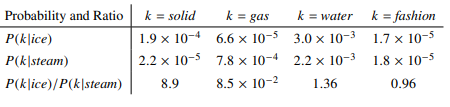

**2. How we used these probabilites to learn word embeddings?**

Our objective is to find a function that measures the similarity between word embeddings and optimize our model to follow the relations found in our coocurrence table.

**How could we measure the similarity between two embeddings?**

We can define the dot product of two vectors a anb of the same length as the sum of the product of their dimensions.

$$a \cdot b = \sum_i^{|a|} a_i \cdot b_i  $$

According to wikipedia, the Doc product is "Algebraically, the dot product is the sum of the products of the corresponding entries of the two sequences of numbers. Geometrically, it is the product of the Euclidean magnitudes of the two vectors and the cosine of the angle between them." And that second definition is why it will be useful to mesure similarity between vectors. The cosine of an angle is 1 when the angle is 0 degrees and 0 when the angle is 90 degrees (orthogonal vectors). This means, that the dot product will get higher the closer two vectors are to be parallel and smaller the closer they are to be perpendicular!

Knowing this, we need to find a function F that allows us to approximate the probabilities from the table using the dot product of two word vectors, as follows:

$$F(u \cdot v) = P(j|i)$$

And given that $e^x$ follows this behaviour, we can train our model using the following loss function:

$$J = \sum_{i,j=1} f(P_{ij})(v_i \cdot v_j - log(P_{ij}))^2$$

Where we are computing the squared error between the similarity between the word vectors (dot product) and $P_{ij}$ the probability learned from the co-ocurrence matrix. The embedding table is learned using gradient descent by optimizing this formula.





## Properties of Word Embeddings

Two of the main properties of word embeddings are they are able to capture the semantic similarities between words and that they are able to learn patterns that are constant between all words in the space. Let's try these properties!

First, let's download pretrained GloVe vectors. As in any deep learning method, training on a large corpus will lead to best results, and we'll be able to see these properties clearer.

In [ ]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip -q /content/glove.6B.zip

--2025-03-09 17:53:19--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip         49%[========>           ] 408.43M  2.25MB/s    eta 95s    

Let's load our embeddings as a python dictionary to access them easily

In [ ]:
import numpy as np

path_to_glove_file = "data/glove.6B/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file, encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


**Exercise 1:** Given the dictionary of word_embeddings and the embedding of word, compute the n most similar words in space. Are they semantically related?

In [ ]:
from scipy.spatial.distance import cosine

def get_embedding(word, word_embeddings):
  if not word in word_embeddings:
    print('Word not found in the vocabulary')
    return None

  return word_embeddings[word]


def get_most_similar(word_emb, word_embeddings, n=10):
  "TO DO"


word_emb = get_embedding('guitar', embeddings_index)
get_most_similar(word_emb, embeddings_index, n=10)


Another popular relation are analogies. In word embeddings, analogies refer to the relationships between words that can be captured as mathematical operations in the vector space. A famous example is "queen = king - man + woman".

Here’s what’s happening:

The word vector for "king" and "man" capture certain semantic features of those words, such as "royalty" and "gender".
By subtracting "man" from "king", you remove the "man" aspect of "king", essentially isolating the "royalty" concept.
Adding "woman" to that result brings back the "woman" aspect, but with the "royalty" feature intact, thus the result of the analogy is "queen".

**Exercise 2** Implement a function to compute analogies and test the following relations:

* Countries and their language.
* Verb tenses.
* Directions (up/down, left/right)

In [ ]:
def get_analogy (word1, word2, word3, word_embeddings):
  '''
  TO DO
  '''


print(get_analogy ('man', 'woman', 'king', embeddings_index))





## Using word embeddings

Now that we've seen that the embedding really encode semantic information, let's try to apply them to a real problem.

Quora is a social media platform where people can post their questions and other users provide answers. While most users post serious questions, some of them post inappropiate questions that may offend other users. To improve the detection of these inappropiate questions Quora created Kaggle competition where teams could submit their detections systems. In this session, we will use their dataset to create a simple classifier using GloVe embeddings.


In [ ]:
! pip install -U gdown


First, we download the dataset

In [ ]:
import gdown

gdown.download('https://drive.google.com/uc?export=download&id=1jAMqL-IcMlcft-NjUOqczQVsVTPUe2B2', 'train.csv')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk import pos_tag

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/"))

# Any results you write to the current directory are saved as output.

In [ ]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Embedding, Dropout
from keras.layers import GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from tqdm import tqdm
tqdm.pandas()
np.random.seed(1)

And load it as a pandas dataset

In [ ]:
train_df = pd.read_csv("/content/train.csv")

** Exercise 3: ** Write a function to clean the dataset. In particular, we need to remove punctuation and other especial characters that are commonly used in websites.

In [ ]:
chars_to_remove='?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’' + '&' + '/-'

def clean_text(x):
  '''
  TO DO
  '''

Apply your function to the dataset

In [ ]:
train_df["question_text"] = train_df["question_text"].progress_apply(lambda x: clean_text(x))

Split dataset between train and test. As we are not going to tune parameters we won't split a validation set, but feel free to add it if you want to perform more experiments.

In [ ]:
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=2018)

Let's see how the different classes are balanced.

In [ ]:
plot = train_df['target'].plot(kind='hist', title="Class distribution")

As we can see the dataset is heavily unbalanced. There are a lot more appropiate questions than inappropiate ones.

To try to mitigate this solution, let's try to use WordNet to perform data augmentation. The idea is to find synonims of the words and create syntethic versions of those sentences using their synonims.

In [ ]:

def get_synonyms(word, pos=None):
    wordnet_pos = {
        "NN": wordnet.NOUN,
        "VB": wordnet.VERB,
        "VBD": wordnet.VERB,
        "VBG": wordnet.VERB,
        "VBN": wordnet.VERB,
        "VBP": wordnet.VERB,
        "JJ": wordnet.ADJ,
        "RB": wordnet.ADV,
        "RBR": wordnet.ADV,
        "RBS": wordnet.ADV,
    }
    if pos:
        if pos in list(wordnet_pos.keys()):
            synsets = wordnet.synsets(word, pos=wordnet_pos[pos])
            synonyms = []
            for synset in synsets:
                synonyms += [str(lemma.name()) for lemma in synset.lemmas()]
            synonyms = [synonym.replace("_", " ") for synonym in synonyms]
            synonyms = list(set(synonyms))
            synonyms = [synonym for synonym in synonyms if synonym != word]
            if synonyms:
                return synonyms[0]
    return ''


def get_syn_sentence(text):
    words = text.split()
    words_with_pos_tag = pos_tag(words)
    words_with_pos_tag
    new_sentence_words = []
    for word, pos in words_with_pos_tag:
        synonym = get_synonyms(word, pos)
        if synonym:
            new_sentence_words.append(synonym)
        else:
            new_sentence_words.append(word)
    synonym_sentence = ' '.join(new_sentence_words)
    return synonym_sentence


Let's extract the innapropiate sentences.

In [ ]:
#df_obscene = train_df.loc[train_df['column_name'] == some_value]

df_obscene = train_df[train_df['target'] == 1]
df_obscene = df_obscene.reset_index()


Generate the synonim sentences

In [ ]:

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

sentence_with_synonyms = []
for idx, row in df_obscene.iterrows():
    sentence_with_synonyms.append(get_syn_sentence(row['question_text']))

df_obscene['question_text'] = sentence_with_synonyms





And add the new sentences to the training dataset.

In [ ]:
#df_obscene.head()
#train_df = train_df.append(df_obscene, ignore_index=True, sort = False)

df_dup = train_df[train_df['target'] == 1]
df_dup = df_dup.reset_index()

train_df = pd.concat([train_df, df_obscene], ignore_index=True)

In [ ]:
plot = train_df['target'].plot(kind='hist', title="Class distribution")

If we compute the class distribution we can see that we double the amount of innapropiate questions. It is still heavily unbalanced, but it will surely help.

### Creating our neural network

To solve the tasks we will create a simple neural network that will classify word embeddings into appropiate and inappropiate questions.

First, we will learn a vocabulary from our training data and use it to tokenize both splits. Remember that this vocabulary will include two extra tokens:

*   **UNK:** The unknown token, it represents all the words that are missing from the vocabulary.
*    **PAD :** The padding token. To be able to process text in batches we need to ensure that all sentences are the same length. This token is used to fill short sentences until arriving to the desired length.



In [ ]:
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a question to use
## fill up the missing values
train_X = train_df["question_text"].fillna("_na_").values
val_X = val_df["question_text"].fillna("_na_").values

## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
val_X = tokenizer.texts_to_sequences(val_X)


## Pad the sentences
train_X = pad_sequences(train_X, maxlen=maxlen)
val_X = pad_sequences(val_X, maxlen=maxlen)

## Get the target values
train_y = train_df['target'].values
val_y = val_df['target'].values

To save memory, let's filter the GloVe embeddings to only use words that exist in our vocabulary. The pretrained model includes 400000 words, that adds up to several gigabytes of GPU memory.

In [ ]:
word_index = {v:k for k,v in tokenizer.index_word.items()}

In [ ]:
## some config values
embed_size = 100 # how big is each word vector
word_index = dict(zip(embeddings_index.keys(), range(max_features)))

num_tokens = max_features + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

**Exercise 4:** Using the library Keras create a simple neural network that includes the following layers:

1. Embedding layer.
2. GlobalMaxPool1D : Combines the embeddings of all the words in the sentence by keeping the maximum value for each dimensions. As a result we get a single sentence embedding, independently of the length of the original sentence.
4. Dense layer to project the embeddings to 16 dimensions.
5. Dropout layer to prevent overfitting.
6. A Dense layer as output layer, with 1 dimension and actication sigmoid.

You can check all the details on the Keras documentation: [Keras](https://keras.io/)

In [ ]:
inp = Input(shape=(maxlen,))
'''
TO DO
'''
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Let's train our model

In [ ]:
model.fit(train_X, train_y, batch_size=512, epochs=2, validation_data=(val_X, val_y))

And evaluate it

In [ ]:
from sklearn import metrics

pred_val_y = model.predict([val_X], batch_size=1024, verbose=1)
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_y, (pred_val_y>thresh).astype(int), average=None)))